In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [22]:
# to fix vscode issues with matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'

# change the path to read in the data
df = pd.read_csv('Cars93.csv')

# what are the numeric columns?
# dt = pd.DataFrame(df.dtypes, columns=['dtypes'])
# dt[dt['dtypes'] != 'object'].sort_values(by='dtypes')

In [23]:
Y = df['MPG.city']
X = df[['Weight']]

In [24]:
type(Y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

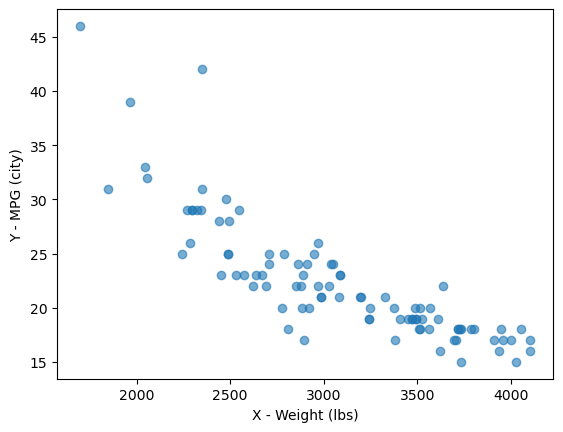

In [25]:
# Y ~ X1 
# MPG ~ weight
plt.scatter( df['Weight'], df['MPG.city'], alpha=0.6);
plt.xlabel("X - Weight (lbs)")
plt.ylabel("Y - MPG (city)");


In [26]:
model = LinearRegression()

In [27]:
model.fit(X, Y)

LinearRegression()

In [28]:
# r2
model.score(X, Y)


0.7108826111181858

In [29]:
model.intercept_ , model.coef_ * 1000

(47.048353174220324, array([-8.03239151]))

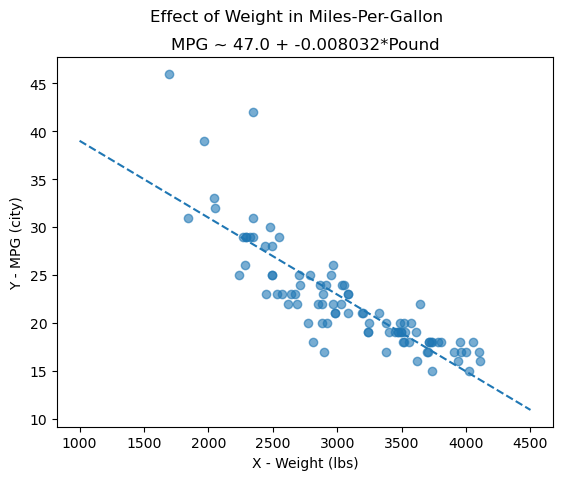

In [30]:
# Y ~ X1 
# MPG ~ weight
plt.scatter( df['Weight'], df['MPG.city'], alpha=0.6);
plt.xlabel("X - Weight (lbs)")
plt.ylabel("Y - MPG (city)");

B0 = model.intercept_
B1 = model.coef_[0]

x0, x1 = 1_000, 4_500
y0, y1 = (B0 + B1*x0), (B0 + B1*x1)
plt.plot([x0, x1], [y0, y1], linestyle='--');
plt.title(f"MPG ~ {round(B0,1)} + {round(B1,6)}*Pound")
plt.suptitle("Effect of Weight in Miles-Per-Gallon");

In [31]:
model.predict([[2_000_000], [3_000]])
# model.predict(X)
# X       Ypred
# ===     =====
# 2000    30.9
# 3000    22.9

c:\Users\jinhe\OneDrive\Documents\Dev10\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-16017.73466315,     22.95117865])

In [32]:
# yhat = ypredicted
yhat = model.predict(X)


In [33]:
results = pd.concat([pd.DataFrame(Y), X, pd.DataFrame(yhat)], axis=1)
results.columns = ['Y', 'X', 'Yhat']
results.head(5)

,Y,X,Yhat
0,25,2705,25.320734
1,18,3560,18.453039
2,20,3375,19.939032
3,19,3405,19.698060
4,22,3640,17.810448


In [34]:
results['residual'] = results['Y'] - results['Yhat']
results.head(5)

,Y,X,Yhat,residual
0,25,2705,25.320734,-0.320734
1,18,3560,18.453039,-0.453039
2,20,3375,19.939032,0.060968
3,19,3405,19.698060,-0.698060
4,22,3640,17.810448,4.189552


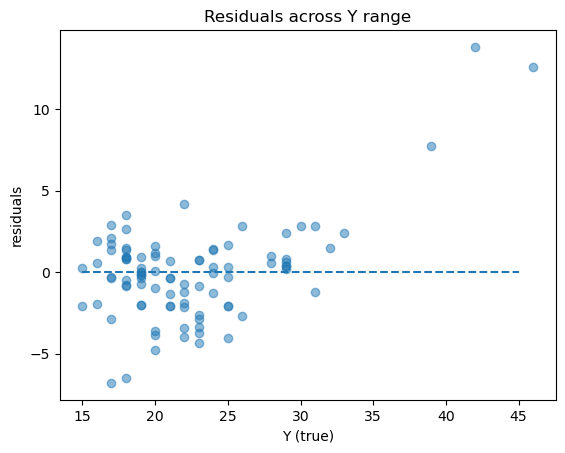

In [35]:
plt.scatter(results['Y'], results['residual'], alpha=0.5);
plt.ylabel('residuals')
plt.xlabel('Y (true)')
plt.title('Residuals across Y range')
plt.plot([15,45],[0,0], linestyle='--');